## HomeWork 1 Due at Mid-night 10/7/2020

### This homework will cover the following skills set
* Using sql 
* Checking for null values and outliers
* Calculate simple statistics using both SQL and Pandas 
* Calculate skew and correlation
* Basic Data Visualization
* How to fix missing values

## Late Policy: Take off 50% after one day, 80% after two days

**Make sure you have pandasql installed. If not, make sure you run the code in the following cell**

In [172]:
import os
try:
    import pandasql as ps
    import pandas as pd
except:
    print("Failed in import pandasql")
    print("Failed in import pandas")
    os.system("pip install pandasql")
    os.system("pip install pandas")

**Import all standard libaries**

In [173]:
import pandas as pd
import pandasql as ps
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Car Crashes dataset Number 2 ##

In [190]:
crash = pd.read_csv("car_crashes2.csv")
print(crash.shape)
crash.head()


(52, 10)


,accidents,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,state,region,division
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL,South,East South Central
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK,West,Pacific
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ,West,Mountain
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR,South,West South Central
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA,West,Pacific


* accidents is the total number of crashes for each state
* speeding is the average speeding in each state

In [175]:
crash.region.unique()

array(['South', 'West', 'Northeast', 'Midwest', 'Territory'], dtype=object)

In [176]:
crash.division.unique()

array(['East South Central', 'Pacific', 'Mountain', 'West South Central',
       'New England', 'South Atlantic', 'East North Central',
       'West North Central', 'Middle Atlantic', 'Territory'], dtype=object)

## Question 1. Check if there are any null or NA

In [177]:
crash.isnull().any()

accidents         False
speeding           True
alcohol           False
not_distracted    False
no_previous       False
ins_premium       False
ins_losses        False
state             False
region            False
division          False
dtype: bool

## Question 2. Remove any rows that has null or NA

In [178]:
df = crash.dropna(inplace=True)
df

In [36]:
crash

,accidents,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,state,region,division
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL,South,East South Central
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK,West,Pacific
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ,West,Mountain
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR,South,West South Central
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA,West,Pacific
5,13.6,5.032,3.808,10.744,12.920,835.50,139.91,CO,West,Mountain
6,10.8,4.968,3.888,9.396,8.856,1068.73,167.02,CT,Northeast,New England
7,16.2,6.156,4.860,14.094,16.038,1137.87,151.48,DE,South,South Atlantic
8,5.9,2.006,1.593,5.900,5.900,1273.89,136.05,DC,South,South Atlantic
9,17.9,3.759,5.191,16.468,16.826,1160.13,144.18,FL,South,South Atlantic


## Question 3. Check if there is any outliers in the alcohol field using both scatter and boxplot

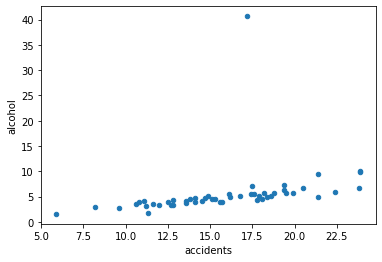

In [179]:
crash.plot.scatter(x='accidents', y ='alcohol')

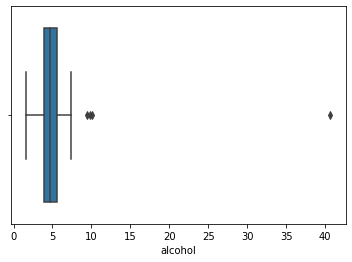

In [79]:
sns.boxplot(x=crash['alcohol'])

## Question 4. Display and then Remove the one outlier row. You should now have 50 rows

In [180]:
crash[ crash.alcohol > 40]


,accidents,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,state,region,division
39,17.2,7.1,40.642,17.472,16.016,905.99,153.86,PR,Territory,Territory


**Type in your code here**

In [181]:
crash = crash[crash.alcohol < 40]
crash.shape

(50, 10)

## Question 5. Calculate the average speeding in usa and Northeast region using SQL

In [182]:
# sql = "select speeding, avg(speeding), from crash where region = 'Northeast'"
sql1 = "select avg(speeding) from crash"
df1 = ps.sqldf(sql1)
df1

,avg(speeding)
0,5.01944


In [184]:
sql2 = "select region, avg(speeding) from crash where region = 'Northeast'"
df2 = ps.sqldf(sql2)
df2

,region,avg(speeding)
0,Northeast,4.42475


**Type in your code here**

## Question 6. Calculate the average alcohol for each region using SQL

In [185]:
sql3 = "select region, avg(alcohol) from crash group by region"
df3 = ps.sqldf(sql3)
df3

,region,avg(alcohol)
0,Midwest,4.996917
1,Northeast,3.980500
2,South,5.414647
3,West,4.754077


**Type in your code here**

## Question 7. Calculate the number of occurrences, mean, min, max of the speeding for each divison using SQL

In [186]:
sql4 = "select division, count(speeding),avg(speeding),min(speeding), max(speeding) from crash group by division"
df4 = ps.sqldf(sql4)
df4

,division,count(speeding),avg(speeding),min(speeding),max(speeding)
0,East North Central,5,4.106600,3.384,4.968
1,East South Central,4,4.533250,2.640,7.332
2,Middle Atlantic,2,5.446000,1.792,9.100
3,Mountain,8,5.812250,3.496,8.346
4,New England,6,4.084333,1.886,5.738
5,Pacific,5,5.949400,4.200,9.450
6,South Atlantic,9,5.030444,2.006,9.082
7,West North Central,7,4.293429,1.937,6.923
8,West South Central,4,6.333750,4.032,7.760


**Type in your code here**

## Question 8. Answer Question 7 but use Pandas functions

In [187]:
df = crash.groupby('division')['speeding'].describe()
df = df.drop(columns = ['std', '25%', '50%', '75%'])
df

,count,mean,min,max
division,,,,
East North Central,5.0,4.106600,3.384,4.968
East South Central,4.0,4.533250,2.640,7.332
Middle Atlantic,2.0,5.446000,1.792,9.100
Mountain,8.0,5.812250,3.496,8.346
New England,6.0,4.084333,1.886,5.738
Pacific,5.0,5.949400,4.200,9.450
South Atlantic,9.0,5.030444,2.006,9.082
West North Central,7.0,4.293429,1.937,6.923
West South Central,4.0,6.333750,4.032,7.760


**Type in your code here**

## Question 9. Calculate the Standard deviation, Skew and Kurtosis for the accidents, speeding, alcohol for each region

In [195]:
drop_cols = ['not_distracted', 'no_previous', 'ins_premium', 'ins_losses','count']
standard_dev = crash.groupby("region").std()
std = std.drop(columns=drop_cols)
std


,accidents,speeding,alcohol
region,,,
Midwest,3.588988,1.537451,1.824432
Northeast,3.077453,2.327773,0.872950
South,4.537037,2.220711,1.773576
West,3.325118,1.803138,1.910356


In [200]:
kurtosis = crash.groupby("region").apply(pd.DataFrame.kurtosis)
drop_cols = ['not_distracted', 'no_previous', 'ins_premium', 'ins_losses']
kurtosis = kurtosis.drop(columns=drop_cols)
kurtosis

,accidents,speeding,alcohol
region,,,
Midwest,2.067092,-0.737061,5.597372
Northeast,1.202058,1.763520,1.342675
South,1.860064,-1.327699,2.125568
Territory,NaN,NaN,NaN
West,-1.048692,-0.465455,2.219220


In [205]:
drop_cols = ['not_distracted', 'no_previous', 'ins_premium', 'ins_losses', 'count']
skew = crash.groupby("region").skew()
skew = skew.drop(columns=drop_cols)
skew

,accidents,speeding,alcohol
region,,,
Midwest,0.950845,0.121197,2.093467
Northeast,0.827106,1.051666,0.949563
South,-1.125839,0.172035,0.330988
Territory,NaN,NaN,NaN
West,0.064819,0.697441,1.159752


**Type in your code here**

## Question 10. Plot the histogram of accidents distribution for different region using 5 bins

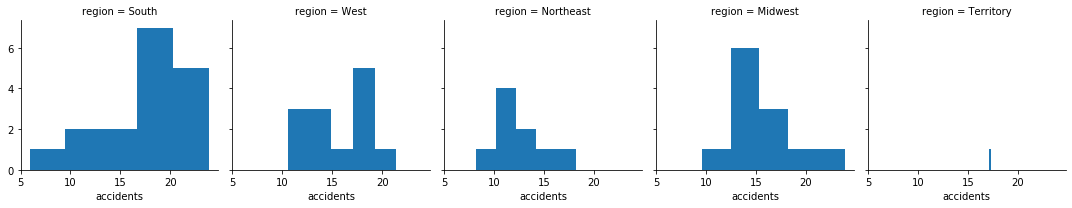

In [213]:
my_hist = sns.FacetGrid(crash, col='region')
my_hist = my_hist.map(plt.hist, 'accidents', bins=5)


**Type in your answer here**

## Question 11. How would you describe the accidents distribution for different region based on the Skew and Kurotsis?
(i.e. who has positive and negative skew and who has positive and negative Kurotsis)

| **Region** | **Skew** | **Kurtosis** |
| --- | --- | --- |
| Midwest  | Positive |Positive|
| Northeast | Positive | Positive |
| South | Negative | Positive |
| West | Positive | Negative |

Based on the data, the South is the only one with negative skew meaning it has fewer accidents
Based on the data, the West has negative kurtosis which equates to fewer accidents outliers



## Question 12. Calculate correlation of all the factors among themselves and determine which factors among speeding, alcohol and ins_premium will affect accidents the most?

In [214]:
crash.corr()

,accidents,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
accidents,1.000000,0.608282,0.323188,0.826369,0.955992,-0.198736,-0.030563
speeding,0.608282,1.000000,0.350131,0.592231,0.571860,-0.055586,-0.042782
alcohol,0.323188,0.350131,1.000000,0.351086,0.325541,-0.041549,0.066106
not_distracted,0.826369,0.592231,0.351086,1.000000,0.748788,-0.171771,-0.061920
no_previous,0.955992,0.571860,0.325541,0.748788,1.000000,-0.155325,0.001797
ins_premium,-0.198736,-0.055586,-0.041549,-0.171771,-0.155325,1.000000,0.620987
ins_losses,-0.030563,-0.042782,0.066106,-0.061920,0.001797,0.620987,1.000000


Speeding affects accidents the most

### Now Load a different dataset (MPG dataset number 3)

In [210]:
mpg = pd.read_csv("mpg3.csv")
print(mpg.shape)
mpg.head()

(405, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,usa,ford torino


## Question 13: Check to see if there are any missing values. Fix the missing values by imputing value from the mean.

In [211]:
print(mpg.isnull().any())
print("\n")
print("Yes, there are missing values in mpg, horsepower, weight")

mpg              True
cylinders       False
displacement    False
horsepower       True
weight           True
acceleration    False
model_year      False
origin          False
name            False
dtype: bool


Yes, there are missing values in mpg, horsepower, weight


### Type your code here to fix the missing values by imputing value from the mean

In [215]:
mpg.mpg = mpg.mpg.fillna(mpg.mpg.mean)
mpg.horsepower = mpg.horsepower.fillna(mpg.horsepower.mean)
mpg.weight = mpg.weight.fillna(mpg.weight.mean)
print(mpg.isnull().any())

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model_year      False
origin          False
name            False
dtype: bool
